In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# (Optional) Evaluate the model on the validation set
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

# Metrics

In [78]:
models_list = pd.DataFrame()

In [79]:
from sklearn import metrics
import numpy as np

def regressionMetrics(y, yhat):
    res = {
        'MSE': metrics.mean_squared_error(y, yhat),
        'RMSE': np.sqrt(metrics.mean_squared_error(y, yhat)),
        'MAE': metrics.mean_absolute_error(y, yhat),
        'RMSLE': np.sqrt(metrics.mean_squared_log_error(np.abs(y), np.abs(yhat))),
        'R2': metrics.r2_score(y, yhat)  # "accuracy" for regression
    }
    return res

Load the file

In [80]:
df = pd.read_pickle('/content/df_model.pkl')


In [81]:
df.to_csv('/content/df_model.csv', index=False)


Use head, describe and info to get to know the data

In [82]:
df.head()

,id,number_of_episodes,vote_count,vote_average,type,status,origin_country,production_companies,episode_run_time,zh,...,first_air_month,last_air_year,last_air_month,first_air_season,last_air_season,name_world,polarity,subjectivity,overview_love,popularity
0,119051,8,7506,8.548,scripted,returning series,359,7402,0,0,...,11,2022,11,Autumn,Autumn,0,0.234343,0.540404,0,164.275
1,100088,9,4065,8.658,scripted,returning series,359,8853,0,0,...,1,2023,3,Winter,Spring,0,-0.262500,0.518750,0,145.629
2,94997,10,3413,8.448,scripted,returning series,359,5196,0,0,...,8,2022,10,Summer,Autumn,0,0.028571,0.514286,0,182.641
3,99966,12,3335,8.354,scripted,returning series,254,4226,65,0,...,1,2022,1,Winter,Winter,0,-0.020000,0.270000,0,107.108
4,92749,6,2392,7.816,miniseries,ended,359,7103,47,0,...,3,2022,5,Spring,Spring,0,-0.066667,0.600000,0,49.843


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19724 entries, 0 to 19723
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    19724 non-null  int64   
 1   number_of_episodes    19724 non-null  int64   
 2   vote_count            19724 non-null  int64   
 3   vote_average          19724 non-null  float64 
 4   type                  19724 non-null  category
 5   status                19724 non-null  category
 6   origin_country        19724 non-null  int64   
 7   production_companies  19724 non-null  int64   
 8   episode_run_time      19724 non-null  int64   
 9   zh                    19724 non-null  int64   
 10  fr                    19724 non-null  int64   
 11  nl                    19724 non-null  int64   
 12  pt                    19724 non-null  int64   
 13  hi                    19724 non-null  int64   
 14  tokyo mx              19724 non-null  int64   
 15  ac

In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,19724.0,212129.209897,29051.823394,3957.000000,204594.25,217944.50000,231056.500000,251213.00000
number_of_episodes,19724.0,10.445498,18.923153,0.000000,2.00,6.00000,11.000000,504.00000
vote_count,19724.0,6.680085,89.138753,0.000000,0.00,0.00000,1.000000,7506.00000
vote_average,19724.0,2.419952,3.507465,0.000000,0.00,0.00000,6.000000,10.00000
origin_country,19724.0,225.849777,105.641551,0.000000,115.00,237.00000,333.000000,393.00000
production_companies,19724.0,7527.731951,2742.285866,0.000000,7799.00,7799.00000,7799.000000,13681.00000
episode_run_time,19724.0,15.400324,34.194924,0.000000,0.00,0.00000,26.000000,2394.00000
zh,19724.0,0.073413,0.260820,0.000000,0.00,0.00000,0.000000,1.00000
fr,19724.0,0.044058,0.205229,0.000000,0.00,0.00000,0.000000,1.00000
nl,19724.0,0.031687,0.175171,0.000000,0.00,0.00000,0.000000,1.00000


## Label Encoding

In [85]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding for categorical columns in df
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()               # Create LabelEncoder for each column
    df[col] = le.fit_transform(df[col])  # Transform the categorical column into numeric
    label_encoders[col] = le          # Store the encoder (in case you need to reverse later)

# Check the transformation
print(df[categorical_cols].head())



   type  status  first_air_season  last_air_season
0     4       5                 0                0
1     4       5                 3                1
2     4       5                 2                0
3     4       5                 3                3
4     1       1                 1                1


Use distplot to find the 'popularity' distribution

<Axes: xlabel='popularity', ylabel='Density'>

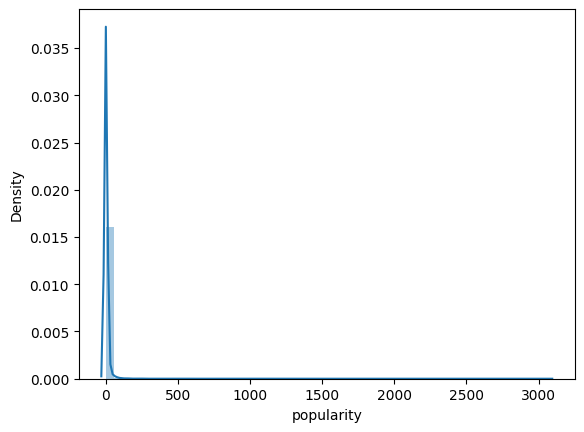

In [86]:
sns.distplot(df.popularity)

Display data correlation

In [87]:
df.corr()

,id,number_of_episodes,vote_count,vote_average,type,status,origin_country,production_companies,episode_run_time,zh,...,first_air_month,last_air_year,last_air_month,first_air_season,last_air_season,name_world,polarity,subjectivity,overview_love,popularity
id,1.000000,-0.103038,-0.177839,-0.294307,0.019304,0.198902,-0.061766,0.058008,-0.184513,-0.014755,...,0.256971,0.410759,0.156251,-0.166156,-0.118144,-0.026848,-0.034563,-0.161666,-0.037489,-0.009285
number_of_episodes,-0.103038,1.000000,0.017658,0.133122,0.104395,-0.046885,-0.053028,0.006159,0.048222,0.180864,...,-0.052795,0.009565,0.065858,0.031849,-0.055961,-0.008316,0.019221,0.064791,0.082763,0.218315
vote_count,-0.177839,0.017658,1.000000,0.112309,-0.000945,-0.037171,0.048661,-0.025225,0.019681,-0.015577,...,-0.002318,-0.027402,0.009739,0.003285,-0.000129,0.000646,0.003939,0.058649,0.005060,0.071776
vote_average,-0.294307,0.133122,0.112309,1.000000,-0.070513,-0.276133,0.034149,-0.060340,0.203496,0.025448,...,-0.045625,-0.108257,0.021057,0.043779,0.018247,0.017513,0.031215,0.217349,0.054005,0.076166
type,0.019304,0.104395,-0.000945,-0.070513,1.000000,0.204902,0.040860,0.052872,-0.099502,0.069966,...,0.010470,0.026335,0.020680,-0.003897,-0.014062,-0.020450,-0.012952,-0.052623,0.060674,0.015043
status,0.198902,-0.046885,-0.037171,-0.276133,0.204902,1.000000,0.051931,0.004901,-0.177994,-0.153690,...,0.032468,0.085448,0.040767,-0.048084,-0.055593,-0.025315,-0.020651,-0.162835,-0.086460,0.013786
origin_country,-0.061766,-0.053028,0.048661,0.034149,0.040860,0.051931,1.000000,-0.019897,0.011336,-0.287777,...,-0.020079,-0.008026,-0.031524,-0.012571,-0.006801,0.003816,0.120554,0.255938,0.027050,0.012945
production_companies,0.058008,0.006159,-0.025225,-0.060340,0.052872,0.004901,-0.019897,1.000000,-0.035519,0.078134,...,-0.005524,-0.011353,0.008071,-0.000529,-0.009794,0.001543,-0.009727,-0.044783,0.005803,-0.007568
episode_run_time,-0.184513,0.048222,0.019681,0.203496,-0.099502,-0.177994,0.011336,-0.035519,1.000000,0.040336,...,-0.049172,-0.101306,-0.009329,0.025924,0.010762,0.007662,0.018588,0.111475,0.028501,0.014169
zh,-0.014755,0.180864,-0.015577,0.025448,0.069966,-0.153690,-0.287777,0.078134,0.040336,1.000000,...,-0.000561,-0.015779,0.002379,0.027561,0.007572,0.002587,-0.009793,0.006647,0.094391,-0.003230


**Overall, there are no particularly strong correlations between most features in the dataset, indicating that the factors** influencing TV show popularity are not heavily interdependent.
However, there are some notable correlations worth mentioning:
*Popularity and Number of Episodes:*

The correlation between popularity and the number of episodes is 0.21, which is relatively weak but still suggests a small positive relationship between these two features. This indicates that shows with more episodes tend to have slightly higher popularity.

There are more interesting correlations found between certain *categorical features:*
Animation has a positive correlation with several features:
Tokyo MX: 0.336
Kids: 0.349
Sci-Fi & Fantasy: 0.275
Action & Adventure & Western: 0.251
Kids also has a notable correlation with Animation: 0.349, suggesting that animated shows tend to be more popular among kids.

*Subjectivity Features:*

The correlation between Subjectivity and certain features is also noticeable:
English (en): 0.315
Polarity: 0.385 These values suggest that both subjectivity and polarity have some correlation with the language of the show, indicating that shows in English and those with certain tonal qualities (positive or negative polarity) might have some relationship with the subjective nature of their content.

*Drama Correlations:*

There are a couple of correlations specific to the Drama genre:
Vote Average: 0.259—This suggests that drama shows tend to have a slightly positive correlation with vote averages, indicating that shows with higher ratings might be more often categorized as dramas.
Status: -0.267—The negative correlation between status and drama shows suggests that certain status values (such as "Canceled" or "Ended") may be more prevalent in the drama genre. This could imply that dramas might have higher cancellation rates or may be more likely to end than other genres.

Display correlation with heatmap

<Axes: >

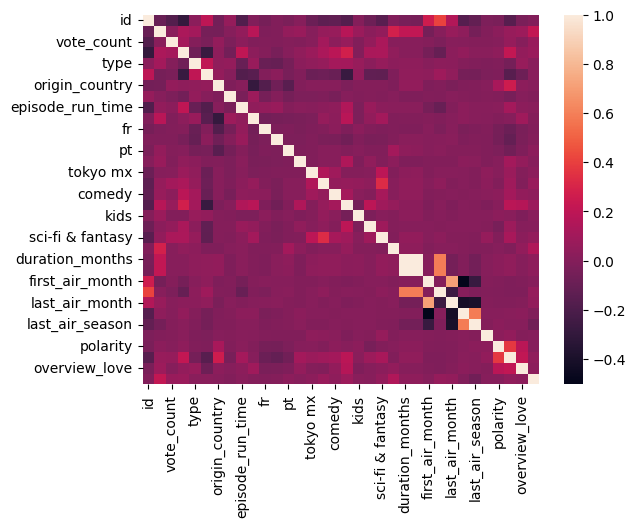

In [88]:
sns.heatmap(df.corr())

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19724 entries, 0 to 19723
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    19724 non-null  int64  
 1   number_of_episodes    19724 non-null  int64  
 2   vote_count            19724 non-null  int64  
 3   vote_average          19724 non-null  float64
 4   type                  19724 non-null  int64  
 5   status                19724 non-null  int64  
 6   origin_country        19724 non-null  int64  
 7   production_companies  19724 non-null  int64  
 8   episode_run_time      19724 non-null  int64  
 9   zh                    19724 non-null  int64  
 10  fr                    19724 non-null  int64  
 11  nl                    19724 non-null  int64  
 12  pt                    19724 non-null  int64  
 13  hi                    19724 non-null  int64  
 14  tokyo mx              19724 non-null  int64  
 15  action & adventure 

Creating  a Linear regression  model with depenant value 'price'

In [90]:
df['popularity'].max()

3065.138

In [91]:
y = df.popularity
X = df.drop(columns=['popularity'])

# Create and Train the Model

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
# Split into train+val and test sets (80% train+val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Split train+val into train and val sets (75% train, 25% val from the train+val set)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42
)

# Regression Models

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
#!pip install xgboost
import xgboost as xgb

### Linear Regression

In [95]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Identify categorical columns that contain string values
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    X_train[col] = le.fit_transform(X_train[col])  # Fit and transform on training data
    X_val[col] = le.transform(X_val[col])  # Apply same transformation to validation data

# Now you can fit your model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val)


In [96]:
regressionMetrics(y_val, y_val_pred)

{'MSE': 3126.7153065496,
 'RMSE': np.float64(55.91703950093925),
 'MAE': 11.485184406586361,
 'RMSLE': np.float64(1.325251867668919),
 'R2': 0.06013017274310506}

In [97]:
model_dict = {'model': "Linear Regression"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val, y_val_pred)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE,R2
0,Linear Regression,3126.715307,55.91704,11.485184,1.325252,0.06013


<Axes: xlabel='popularity'>

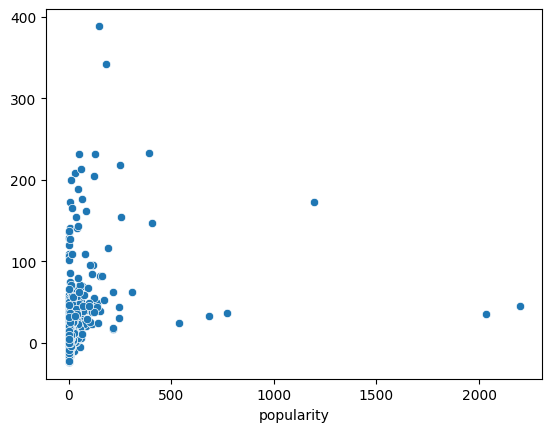

In [98]:
sns.scatterplot(x=y_val, y=y_val_pred)

### Decision Tree

In [99]:
mod2 = DecisionTreeRegressor(random_state=1)
mod2.fit(X_train, y_train)
# Make predictions on the validation set
y_val_pred2 = mod2.predict(X_val)

In [100]:
regressionMetrics(y_val, y_val_pred2)

{'MSE': 4201.907575918885,
 'RMSE': np.float64(64.82212258109793),
 'MAE': 6.947606083650191,
 'RMSLE': np.float64(0.6908978965338921),
 'R2': -0.2630654729759845}

In [101]:
model_dict = {'model': "Decision Tree"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val, y_val_pred2)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list


,model,MSE,RMSE,MAE,RMSLE,R2
0,Linear Regression,3126.715307,55.917040,11.485184,1.325252,0.060130
1,Decision Tree,4201.907576,64.822123,6.947606,0.690898,-0.263065


<Axes: xlabel='popularity'>

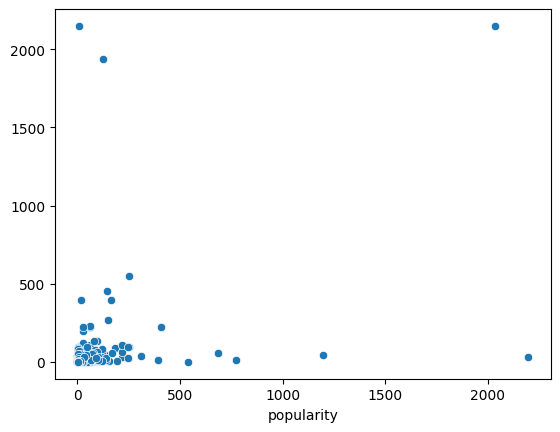

In [102]:
sns.scatterplot(x=y_val, y=y_val_pred2)

### Random Forest


In [103]:
mod3 = RandomForestRegressor(random_state=1)
mod3.fit(X_train, y_train)
# Make predictions on the validation set
y_val_pred3 = mod3.predict(X_val)

In [104]:
regressionMetrics(y_val, y_val_pred3)

{'MSE': 2236.9049697009027,
 'RMSE': np.float64(47.29592973714443),
 'MAE': 6.5619434448669205,
 'RMSLE': np.float64(0.6168927783526217),
 'R2': 0.32760124240958743}

In [105]:
pred3 = mod3.predict(X)
model_dict = {'model': "RandomForest"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val, y_val_pred3)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE,R2
0,Linear Regression,3126.715307,55.917040,11.485184,1.325252,0.060130
1,Decision Tree,4201.907576,64.822123,6.947606,0.690898,-0.263065
2,RandomForest,2236.904970,47.295930,6.561943,0.616893,0.327601


<Axes: xlabel='popularity'>

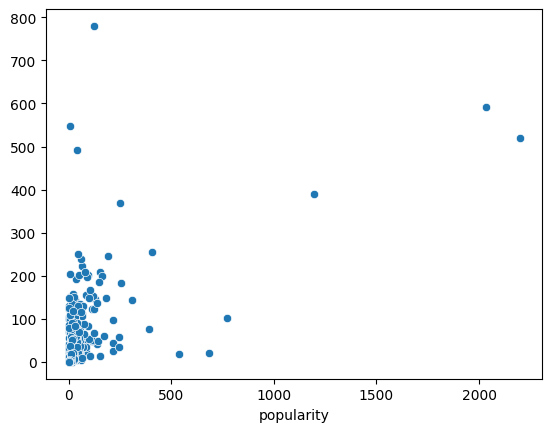

In [106]:
sns.scatterplot(x=y_val, y=y_val_pred3)

### Adaptive Boosting (ADABoost)

In [107]:
mod4 = AdaBoostRegressor(random_state=1)
mod4.fit(X_train, y_train)

AdaBoostRegressor(random_state=1)

In [108]:
# Make predictions on the validation set
y_val_pred4 = mod4.predict(X_val)

In [109]:
model_dict = {'model': "ADABoost"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val, y_val_pred4)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE,R2
0,Linear Regression,3126.715307,55.917040,11.485184,1.325252,0.060130
1,Decision Tree,4201.907576,64.822123,6.947606,0.690898,-0.263065
2,RandomForest,2236.904970,47.295930,6.561943,0.616893,0.327601
3,ADABoost,9892.165544,99.459366,71.933160,3.132281,-1.973519


<Axes: xlabel='popularity'>

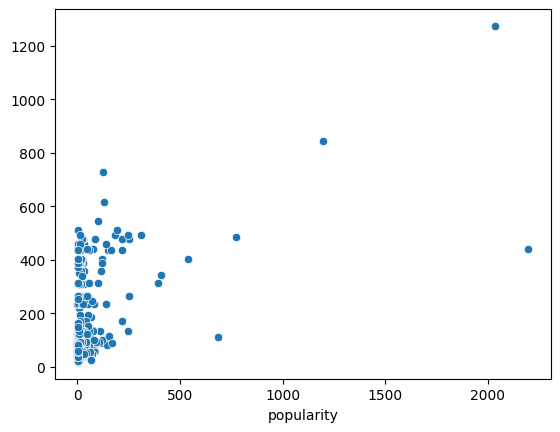

In [110]:
sns.scatterplot(x=y_val, y=y_val_pred4)

### Gradient Boosting Machine (GBM)

In [111]:
mod5 = GradientBoostingRegressor(random_state=1)
mod5.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

In [112]:
# Make predictions on the validation set
y_val_pred5 = mod5.predict(X_val)

In [113]:
model_dict = {'model': "GBM"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val, y_val_pred5)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE,R2
0,Linear Regression,3126.715307,55.917040,11.485184,1.325252,0.060130
1,Decision Tree,4201.907576,64.822123,6.947606,0.690898,-0.263065
2,RandomForest,2236.904970,47.295930,6.561943,0.616893,0.327601
3,ADABoost,9892.165544,99.459366,71.933160,3.132281,-1.973519
4,GBM,3046.420474,55.194388,7.833091,0.776698,0.084266


<Axes: xlabel='popularity'>

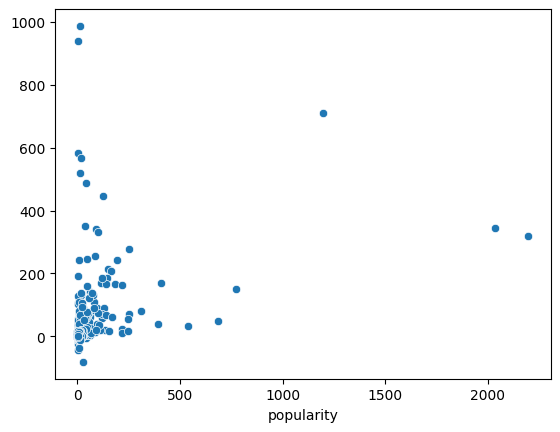

In [114]:
sns.scatterplot(x=y_val, y=y_val_pred5)

### Support Vector Machine (SVM)

In [115]:
mod6 = SVR()
mod6.fit(X_train, y_train)
# Make predictions on the validation set
y_val_pred6 = mod6.predict(X_val)

In [116]:
model_dict = {'model': "SVM"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val,y_val_pred6)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list


,model,MSE,RMSE,MAE,RMSLE,R2
0,Linear Regression,3126.715307,55.917040,11.485184,1.325252,0.060130
1,Decision Tree,4201.907576,64.822123,6.947606,0.690898,-0.263065
2,RandomForest,2236.904970,47.295930,6.561943,0.616893,0.327601
3,ADABoost,9892.165544,99.459366,71.933160,3.132281,-1.973519
4,GBM,3046.420474,55.194388,7.833091,0.776698,0.084266
5,SVM,3356.918548,57.938921,6.641182,0.947196,-0.009067


<Axes: xlabel='popularity'>

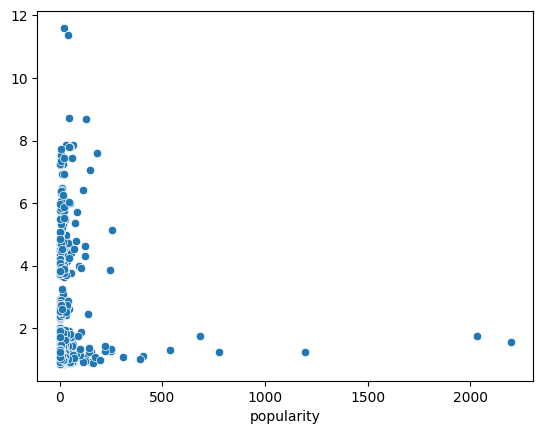

In [117]:
sns.scatterplot(x=y_val, y=y_val_pred6)

### XGBoost Regressor

In [118]:
mod7= xgb.XGBRegressor()
mod7.fit(X_train, y_train)
# Make predictions on the validation set
y_val_pred7 = mod7.predict(X_val)

In [119]:
model_dict = {'model': "XGB"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_val,y_val_pred7)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE,R2
0,Linear Regression,3126.715307,55.917040,11.485184,1.325252,0.060130
1,Decision Tree,4201.907576,64.822123,6.947606,0.690898,-0.263065
2,RandomForest,2236.904970,47.295930,6.561943,0.616893,0.327601
3,ADABoost,9892.165544,99.459366,71.933160,3.132281,-1.973519
4,GBM,3046.420474,55.194388,7.833091,0.776698,0.084266
5,SVM,3356.918548,57.938921,6.641182,0.947196,-0.009067
6,XGB,1727.812754,41.566967,6.676390,0.728689,0.480631


<Axes: xlabel='popularity'>

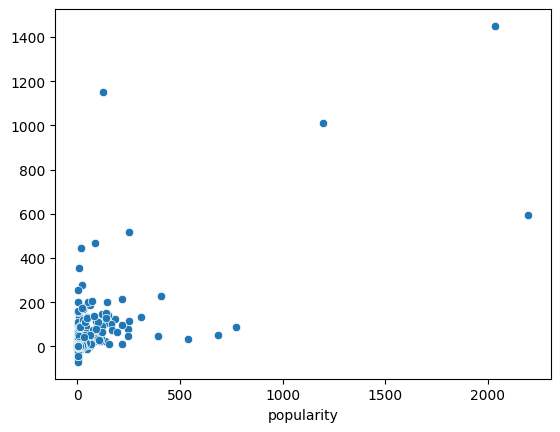

In [120]:
sns.scatterplot(x=y_val, y=y_val_pred7)

In [121]:
## Model Selection

Metrics:<br><b>MSE</b> - Mean Squared Error<br><b>RMSE</b> Root Mean Squared Error<br><b>MAE </b>Mean Absolute Error Calculates the average of the absolute differences between predicted and actual values.<br>
<b>RMSLE</b> Root Mean Squared Logarithmic Error

In [122]:
models_list.sort_values('MAE')

,model,MSE,RMSE,MAE,RMSLE,R2
2,RandomForest,2236.904970,47.295930,6.561943,0.616893,0.327601
5,SVM,3356.918548,57.938921,6.641182,0.947196,-0.009067
6,XGB,1727.812754,41.566967,6.676390,0.728689,0.480631
1,Decision Tree,4201.907576,64.822123,6.947606,0.690898,-0.263065
4,GBM,3046.420474,55.194388,7.833091,0.776698,0.084266
0,Linear Regression,3126.715307,55.917040,11.485184,1.325252,0.060130
3,ADABoost,9892.165544,99.459366,71.933160,3.132281,-1.973519


**Best Performer: Random Forest is the best model overall with the lowest MSE, RMSE, and MAE. It provides a balanced performance across all metrics.**

**SVM** shows a higher MSE and RMSE, meaning it struggles more with prediction errors compared to Random Forest.

**XGBoost** performs similarly to Random Forest but has a slightly higher MAE and RMSLE.

**GBM** and **Decision Tree** exhibit higher errors, especially with higher MSE and MAE values, which means their predictions are less accurate on average.

**AdaBoost** performs the worst, particularly due to its high MAE and RMSLE, indicating that it makes substantial prediction errors.

# Hyperparameters and Finetuning

In [123]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV


# Random Search: we decide which parameters and how (randomly)

In [124]:
# Reduced number of options for each hyperparameter
n_estimators = [100, 200, 300]  # Fewer values for the number of trees
max_features = ['auto','sqrt']  #  # Number of features to consider at each split
max_depth = [10, 20, 30, 40, None]  # Fewer values for max depth
min_samples_split = [2, 5, 10]  # Keep essential options only
min_samples_leaf = [1, 2, 4]  # Reduced options for leaf samples
bootstrap = [True, False]  # Keep as is

# Create a lighter random grid
lighter_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

print(lighter_grid)

# Reduced number of iterations and cross-validation folds
rf_random = RandomizedSearchCV(estimator=mod3, param_distributions=lighter_grid, n_iter=25, cv=3,
                              verbose=2, random_state=42, n_jobs=1)


# Fit the random search model
rf_random.fit(X_train, y_train)

{'n_estimators': [100, 200, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1),
                   n_iter=25, n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [125]:
import pickle

# Save the RandomizedSearchCV model to a pickle file
with open('rf_random_model.pkl', 'wb') as f:
    pickle.dump(rf_random, f)

print("Model has been saved successfully!")


Model has been saved successfully!


In [126]:
from sklearn.metrics import mean_squared_error
import numpy as np

def evaluate(model, test_features, test_labels):
    # Make predictions
    predictions = model.predict(test_features)

    # Calculate Mean Absolute Error (MAE)
    mae = np.mean(abs(predictions - test_labels))

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(test_labels, predictions))

    # Print model performance
    print('Model Performance')
    print('Mean Absolute Error: {:0.4f}'.format(mae))
    print('Root Mean Squared Error: {:0.4f}'.format(rmse))

    # Return both MAE and RMSE
    return mae, rmse


# Running Base model and best estimator from RandomizedSearchCV

In [127]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Function to evaluate the model
def evaluate(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate MAE, RMSE, and R²
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    return mae, rmse, r2

# Fit the base model
base_model = RandomForestRegressor(n_estimators=100, random_state=42)
base_model.fit(X_train, y_train)

# Evaluate the base model (returns MAE, RMSE, and R²)
base_mae, base_rmse, base_r2 = evaluate(base_model, X_test, y_test)

# Get the best estimator from RandomizedSearchCV and evaluate it (returns MAE, RMSE, and R²)
best_random = rf_random.best_estimator_
random_mae, random_rmse, random_r2 = evaluate(best_random, X_test, y_test)

# Calculate the improvements in MAE and RMSE (R² is not in percentage)
mae_improvement = 100 * (base_mae - random_mae) / base_mae
rmse_improvement = 100 * (base_rmse - random_rmse) / base_rmse

# Print the improvements and R² values
print(f'Improvement in MAE: {mae_improvement:0.2f}%')
print(f'Improvement in RMSE: {rmse_improvement:0.2f}%')
print(f'Base R²: {base_r2:0.3f}')
print(f'Optimized R²: {random_r2:0.3f}')


Improvement in MAE: 2.40%
Improvement in RMSE: -0.72%
Base R²: 0.248
Optimized R²: 0.237


## Conclusion

Improvement in MAE: The optimized model showed a 2.40% improvement in Mean Absolute Error (MAE), indicating a slight reduction in prediction errors compared to the base model.The model's performance is not satisfactory. We will not proceed with sending it to production